<a href="https://www.kaggle.com/code/anderaraujo/customer-clusterizatio-eda-k-means?scriptVersionId=161468890" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Clustering Customers with K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I am going to create two dataframes for analysis

In [2]:
df_num  = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')
df_num = df_num.iloc[:,1:]
df_num.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [3]:
df  = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Below we are going to revert dataframe to the labeled format again in order to perform an EDA

In [4]:
df['Sex'] = df['Sex'].replace({0:'male',1:'female'})

df['Marital status'] = df['Marital status'].replace({0:'single',1:'non-single'})

df['Education'] = df['Education'].replace({0:'other / unknown',
                        1:'high school',
                        2:'university',
                        3:'graduate school'})

df['Occupation'] = df['Occupation'].replace({0:'unemployed / unskilled',
                            1:'skilled employee / official',
                            2:'management / self-employed / highly qualified employee / officer'})

df['Settlement size'] = df['Settlement size'].replace({0:'small city',
                                1:'mid-sized city',
                                2:'big city'})


In [5]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,male,single,67,university,124670,skilled employee / official,big city
1,100000002,female,non-single,22,high school,150773,skilled employee / official,big city
2,100000003,male,single,49,high school,89210,unemployed / unskilled,small city
3,100000004,male,single,45,high school,171565,skilled employee / official,mid-sized city
4,100000005,male,single,53,high school,149031,skilled employee / official,mid-sized city


Let's define a function to print plots faster

# Exploratory Data Analysis

In [6]:
def print_plot(var1, var2):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data = df, x = var1, hue = var2)
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.bar_label(ax.containers[1], fontsize=10)
    ax.set(title = f'{var1} per {var2}')
    ax.legend(loc = 'upper left')
    ax.set_yticks([])
    ax.set_ylabel('')

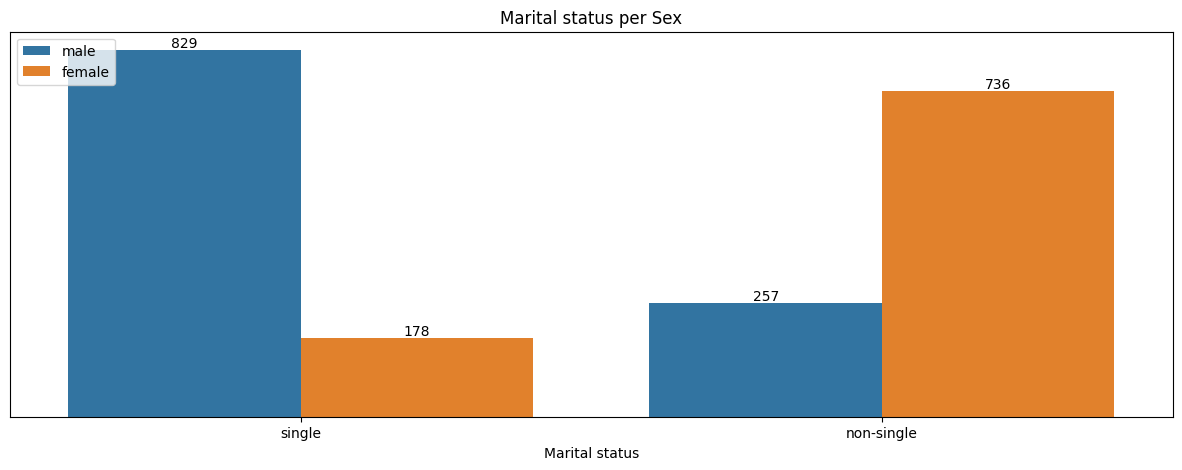

In [7]:
print_plot('Marital status', 'Sex')

We can see that we have more mens single

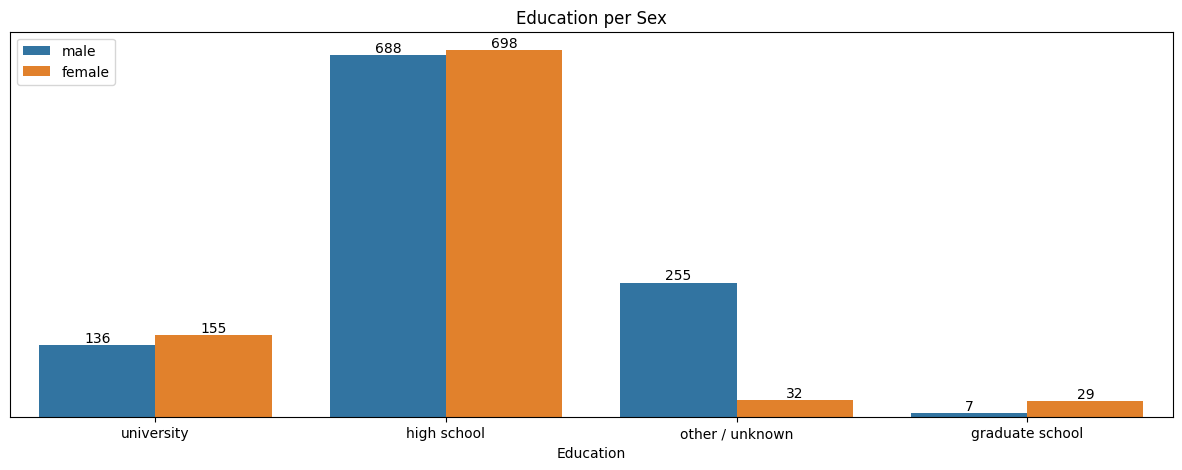

In [8]:
print_plot('Education','Sex')

Womens are used to study more than Mens, even Woman population being smaller

<Axes: xlabel='Education', ylabel='Age'>

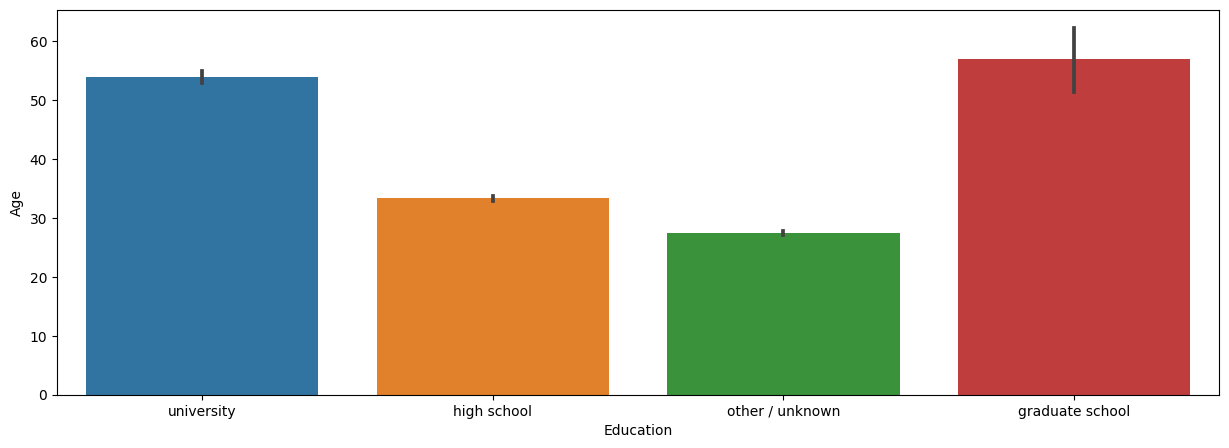

In [9]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, x = 'Education', y = 'Age')

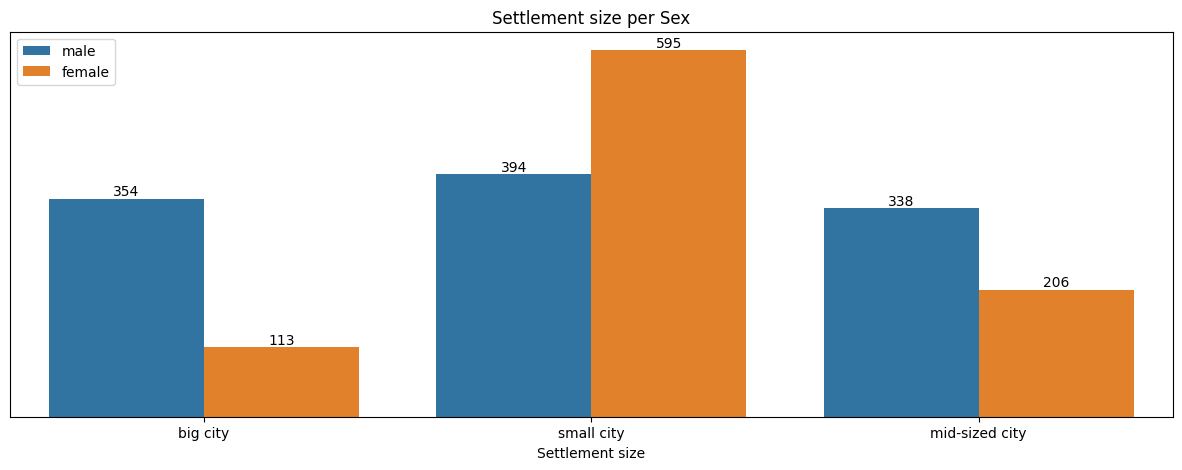

In [10]:
print_plot('Settlement size','Sex')

We can see that Womens are mostly located in small cities than Mens

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(35.909, 310, 'age mean = 35.91 years')

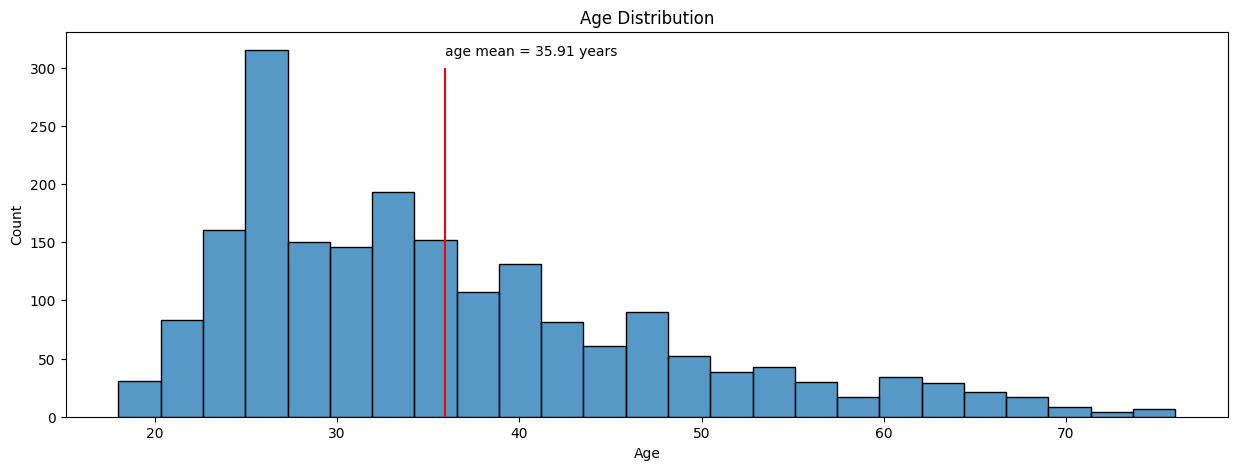

In [11]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data = df, x = 'Age')
ax.set(title = 'Age Distribution')
plt.vlines(df.Age.mean(),0, 300, color = 'red')
plt.annotate('age mean = %.2f years' % df.Age.mean(), (df.Age.mean(), 310))

We see the most part of population are under 35 and our distribution is right skewed

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(120954.419, 200, 'age mean = 120954.42')

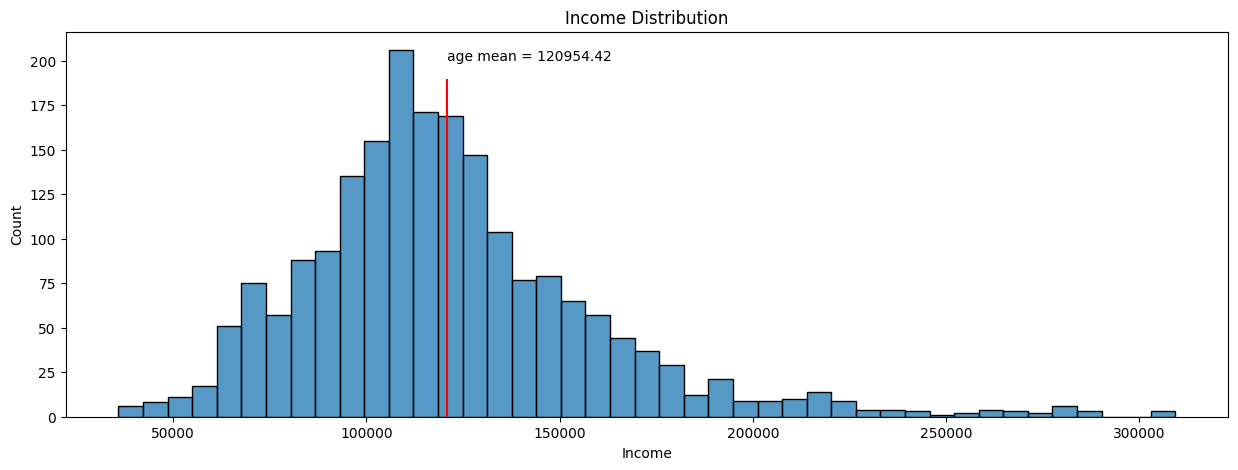

In [12]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data = df, x = 'Income')
ax.set(title = 'Income Distribution')
plt.vlines(df.Income.mean(),0, 190, color = 'red')
plt.annotate('age mean = %.2f' % df.Income.mean(), (df.Income.mean(), 200))

Considering this distribution we can perceive we have outliers. Let's confirm it

[Text(0.5, 1.0, 'Income Distribution')]

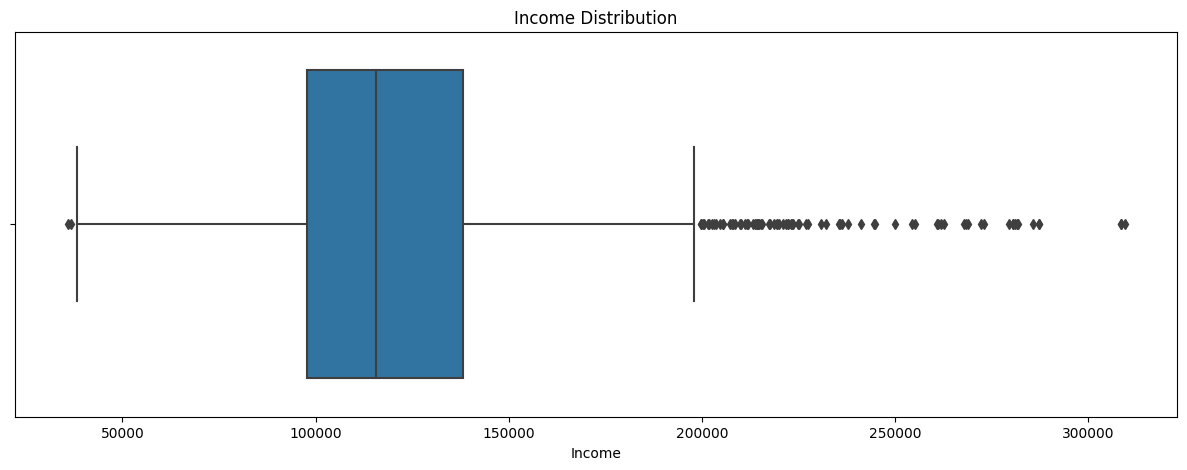

In [13]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data = df, x = 'Income',)
ax.set(title = 'Income Distribution')

Text(0.5, 1.0, 'Correlation Plot')

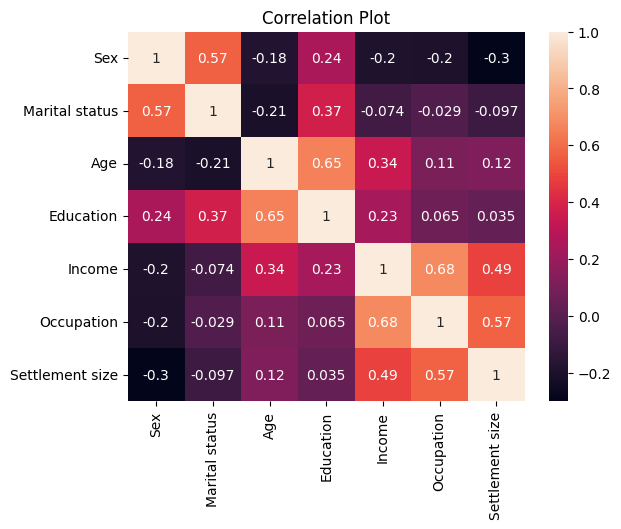

In [14]:
ax = sns.heatmap(df_num.corr(), annot = True)
ax.set_title('Correlation Plot')

In [15]:
from sklearn.cluster import KMeans

In [16]:
clusters = range(1,20)
inertias = []
for n in clusters:
    kmeans = KMeans(n_init = 1, n_clusters = n)
    fitted_model = kmeans.fit(df_num)
    inertias.append(fitted_model.inertia_)
    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


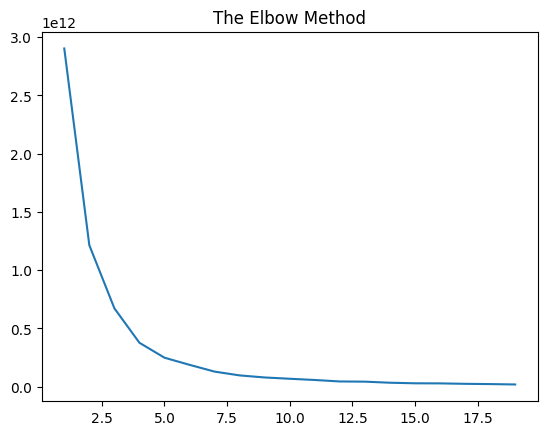

In [17]:
ax = sns.lineplot(x = range(1,20), y = inertias)
ax.set_title('The Elbow Method')
plt.show()

According to the elbow method we can assume 4 clusters for our data

In [18]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(df_num)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df_num['cluster'] = labels

<Axes: xlabel='Age', ylabel='Income'>

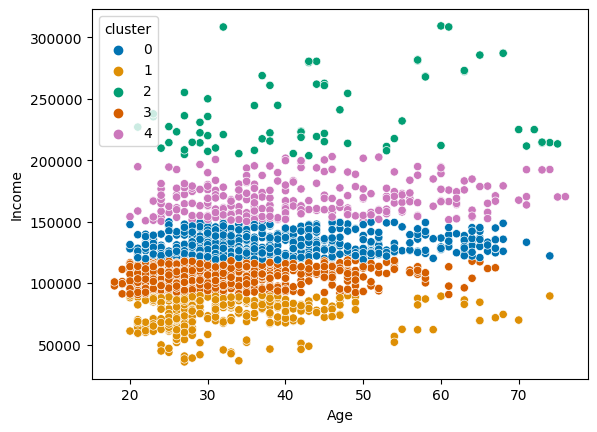

In [20]:
sns.scatterplot(data = df_num, x = 'Age', y = 'Income', hue = 'cluster', palette='colorblind')

five cluster is aceptable, but let's see if it can be better

In [21]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_num, df_num.cluster)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5401417592419644


The silhouette score ranges from -1 to 1.    
A higher silhouette score indicates better-defined clusters.    
Evaluate the score based on the following guidelines:    
0.71 - 1.0: Excellent clustering.    
0.51 - 0.70: Reasonable clustering.    
0.26 - 0.50: Poor clustering.    
Less than 0.25: Very poor clustering

Let's try different numbers of clusters

In [22]:
SEED = np.random.seed(300)

In [23]:
df_num.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 4, random_state = SEED)
labels = kmeans.fit_predict(df_num)
df_num['cluster'] = labels
silhouette_avg = silhouette_score(df_num, df_num.cluster)
print(f"Silhouette Score: {silhouette_avg}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5428478923817803


In [24]:
df_num.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 3, random_state = SEED)
labels = kmeans.fit_predict(df_num)
df_num['cluster'] = labels
silhouette_avg = silhouette_score(df_num, df_num.cluster)
print(f"Silhouette Score: {silhouette_avg}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5124475350459476


In [25]:
df_num.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 6, random_state = SEED)
labels = kmeans.fit_predict(df_num)
df_num['cluster'] = labels
silhouette_avg = silhouette_score(df_num, df_num.cluster)
print(f"Silhouette Score: {silhouette_avg}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5438880635822168


We can conclude that the best number of clusters was 4 as Elbow method also showed before.
Now our customers are clusterized and we can

<Axes: xlabel='Age', ylabel='Income'>

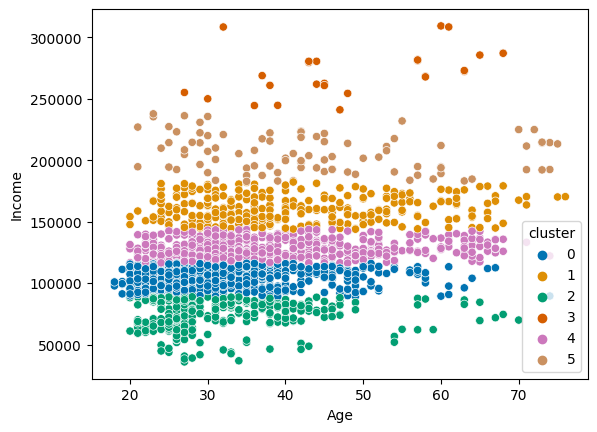

In [26]:
sns.scatterplot(data = df_num, x = 'Age', y = 'Income', hue = 'cluster', palette='colorblind')

With this plot, it is possible to see that our clustering has improved. This project could assist companies in gaining a better understanding of their customers and identifying various customer patterns. Such insights can be valuable for creating or offering customized products tailored to each specific customer group